In [1]:
# Import libs
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Data
data = pd.read_csv("/Users/punitshah/Downloads/Bank_churn.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check for NUlL values
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#Check the distribution of classes
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:>

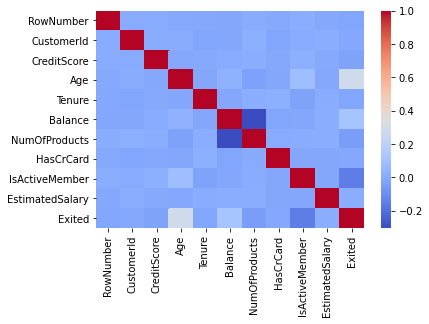

In [6]:
#Check the correlation
sns.heatmap(data.corr(),yticklabels=True,cmap='coolwarm')

In [7]:
Gender=pd.get_dummies(data['Gender'],drop_first=True)
data=pd.concat([data,Gender], axis=1)
data.drop(['Surname','Geography','Gender'], axis=1, inplace=True)

data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0


In [8]:
#Get data in X & y format
X = data.drop(columns=['Exited'])
y = data['Exited']

In [9]:
#Split the data in Train & Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=101)

In [10]:
#Define model
nb_model = GaussianNB()

In [11]:
nb_model

GaussianNB()

In [12]:
#Start the training
nb_model.fit(X_train,y_train)

GaussianNB()

In [13]:
#Predict classes
predicted_class = nb_model.predict(X_test)

In [14]:
# Import Metics
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report

In [15]:
#get the classification report
print(classification_report(predicted_class,y_test))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2862
           1       0.06      0.25      0.09       138

    accuracy                           0.77      3000
   macro avg       0.51      0.52      0.48      3000
weighted avg       0.92      0.77      0.83      3000



In [16]:
#Get the confusion matrix
print(confusion_matrix(predicted_class,y_test))

[[2275  587]
 [ 103   35]]


In [17]:
cm = confusion_matrix(predicted_class,y_test)

In [18]:
cm

array([[2275,  587],
       [ 103,   35]])

<AxesSubplot:>

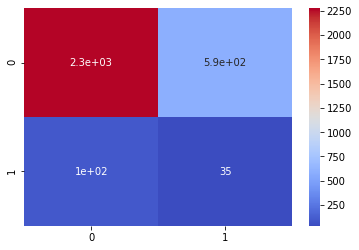

In [19]:
#Print the confusion matrix
sns.heatmap(cm,annot=True,cmap="coolwarm")

In [20]:
#Import some important metrics
from sklearn.metrics import accuracy_score,auc,roc_curve

In [21]:
#Get accuracy score
accuracy_score(predicted_class,y_test)

0.77

In [22]:
#Get the probablity instead of classes
predicted_prob = nb_model.predict_proba(X_test)

In [23]:
# Probablity for 0 and 1
predicted_prob

array([[0.77198755, 0.22801245],
       [0.93699292, 0.06300708],
       [0.72548198, 0.27451802],
       ...,
       [0.90841812, 0.09158188],
       [0.62308695, 0.37691305],
       [0.68259066, 0.31740934]])

In [24]:
# Getting true positive rate, false positive rate and threashold
fpr, tpr, thrashold = roc_curve(y_test,predicted_prob[::,1])

In [25]:
roc_auc = auc(fpr,tpr)

In [26]:
roc_auc

0.7521370872872715

/Users/punitshah/opt/anaconda3/envs/greyatom/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/punitshah/opt/anaconda3/envs/greyatom/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


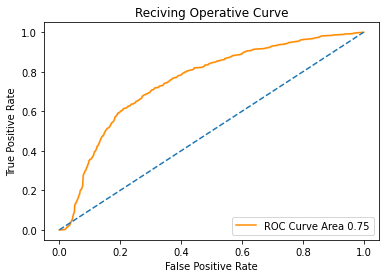

In [27]:
#Plot ROC Curve
sns.lineplot(fpr,tpr,label="ROC Curve Area %0.2f" % roc_auc,color="darkorange")
sns.lineplot([0,1],[0,1],linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciving Operative Curve")
plt.legend(loc="lower right")